<a href="https://colab.research.google.com/github/shashikala16/Machine-Learning/blob/main/ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing python libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
#Reading the Email and sms datasets
e=pd.read_csv('/content/mail_data.csv')
s=pd.read_csv('/content/SMSCollection.csv')

In [ ]:
#Sample records of Email datasset
e.sample(5)


,Category,Message
2663,spam,Hello darling how are you today? I would love ...
3150,ham,"Sorry, in meeting I'll call you later"
2390,ham,Boo. How's things? I'm back at home and a litt...
1961,spam,Guess what! Somebody you know secretly fancies...
419,ham,"Alright, I'll head out in a few minutes, text ..."


In [ ]:
#Sample record of SMS dataset
s.sample(5)

,Class,sms
3657,ham,Oh really?? Did you make it on air? What's you...
3575,ham,Yeah sure I'll leave in a min
4747,ham,Orh i tot u say she now still dun believe.
4847,ham,Pls help me tell Ashley that i cant find her n...
2204,ham,soon you will have the real thing princess! Do...


In [ ]:
s.describe()

,Class,sms
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [ ]:
e.describe()

,Category,Message
count,5572,5572
unique,2,5157
top,ham,"Sorry, I'll call later"
freq,4825,30


In [ ]:
e.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [ ]:
s.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Class   5572 non-null   object
 1   sms     5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [ ]:
#Renaming of Columns

In [ ]:
e.rename(columns={'Category':'target','Message':'text'},inplace=True)


**here we rename the column names as Category with target and Message with text**

In [ ]:
s.rename(columns={'Class':'target','sms':'text'},inplace=True)

**here we rename the column names as Class with target and sms with text**

In [ ]:
e.sample(5)

,target,text
3116,ham,I wait 4 ü inside da car park...
447,ham,"Well done, blimey, exercise, yeah, i kinda rem..."
3145,ham,"Haha I heard that, text me when you're around"
3417,ham,Uhhhhrmm isnt having tb test bad when youre sick
3770,ham,Was gr8 to see that message. So when r u leavi...


In [ ]:
s.sample(5)

,target,text
143,ham,"A swt thought: ""Nver get tired of doing little..."
5127,ham,Cuz ibored. And don wanna study
3715,ham,"Oh, i will get paid. The most outstanding one ..."
2537,ham,You do what all you like
391,ham,Huh so late... Fr dinner?


# Conversion of categorical Values into numeric values of target attribute

In [ ]:
from sklearn.preprocessing import LabelEncoder
encode=LabelEncoder()

**As this is a classification problem we want the “target" to be binary classified i.e, 0 or 1 so for this purpose we use label encoder ** **bold text**


In [ ]:
s['target']=encode.fit_transform(s['target'])

In [ ]:
e['target']=encode.fit_transform(e['target'])

In [ ]:
s.sample(5)

,target,text
4010,0,Ha... Then we must walk to everywhere... Canno...
1526,0,Pls pls find out from aunt nike.
261,0,Yup
3791,0,I love you !!! You know? Can you feel it? Does...
3000,0,"Oh, then your phone phoned me but it disconnected"


In [ ]:
e.sample(5)

,target,text
2342,0,Tell dear what happen to you. Why you talking ...
3103,0,Even if he my friend he is a priest call him now
5277,0,"Best msg: It's hard to be with a person, when ..."
4555,0,Try to do something dear. You read something f...
1433,0,Thanks for ve lovely wisheds. You rock


# **shape of each dataset**

In [ ]:
display(s.shape,e.shape)

(5572, 2)

(5572, 2)

## **Merging of datasets**

In [ ]:
merged=pd.concat([s,e])
merged.shape


(11144, 2)

**here the merged dataset contains 11144 rows and 2 coloumns**

In [ ]:
merged.sample(10)

,target,text
555,0,I‘ll have a look at the frying pan in case it‘...
3738,0,Plz note: if anyone calling from a mobile Co. ...
510,0,Your opinion about me? 1. Over 2. Jada 3. Kusr...
4617,0,Ü called dad oredi...
3240,0,Am okay. Will soon be over. All the best
4560,0,Think + da. You wil do.
1501,0,Host-based IDPS for linux systems.
3807,1,URGENT! We are trying to contact you. Last wee...
3674,0,Moji just informed me that you saved our lives...
3531,0,Tyler (getting an 8th) has to leave not long a...


In [ ]:
merged.isnull().sum()

target    0
text      0
dtype: int64

***no null values**

# Finding duplicate values

In [ ]:
merged.duplicated().sum()

5796

***merged dataset shows 5796 duplicate values**

In [ ]:
d=merged.duplicated()
d

0       False
1       False
2       False
3       False
4       False
        ...  
5567     True
5568     True
5569     True
5570     True
5571     True
Length: 11144, dtype: bool

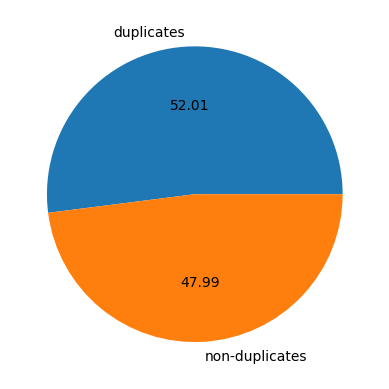

In [ ]:
plt.pie(d.value_counts(),labels=['duplicates','non-duplicates'],autopct="%0.2f")
plt.show()

***there are more no of duplicates**

# Removing duplicates from merged dataset

In [ ]:
merged=merged.drop_duplicates(keep='first')

In [ ]:
merged.duplicated().sum()

0

***by dropping all the duplicates ,merged dataset has no duplicate values.**

In [ ]:
merged.shape

(5348, 2)

# EDA(Exploratory Data Analysis)

---



In [ ]:
merged.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


# To get a count of spam and ham messages and emails

In [ ]:
merged['target'].value_counts()

0    4674
1     674
Name: target, dtype: int64

<Axes: xlabel='target', ylabel='Count'>

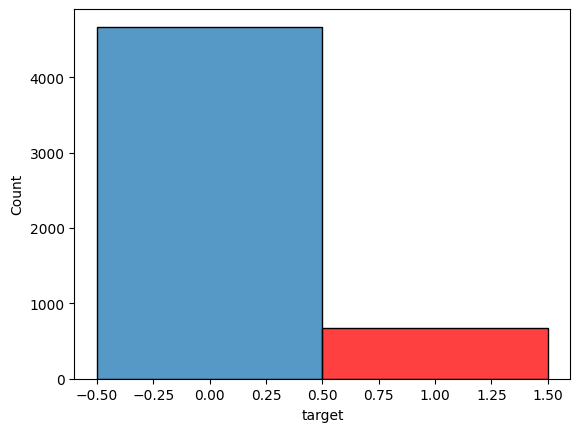

In [ ]:

sns.histplot(merged[merged['target']==0]['target'])
sns.histplot(merged[merged['target']==1]['target'],color='red')

**data is imbalanced**

In [ ]:
from sklearn.utils import resample
#create two different dataframe of majority and minority class
df_majority = merged[(merged['target']==0)]
df_minority = merged[(merged['target']==1)]
# upsample minority class
df_minority_upsampled = resample(df_minority,
                                 replace=True,    # sample with replacement
                                 n_samples= 4674, # to match majority class
                                 random_state=42)  # reproducible results
# Combine majority class with upsampled minority class
merged = pd.concat([df_minority_upsampled,df_majority])

<Axes: xlabel='target', ylabel='Count'>

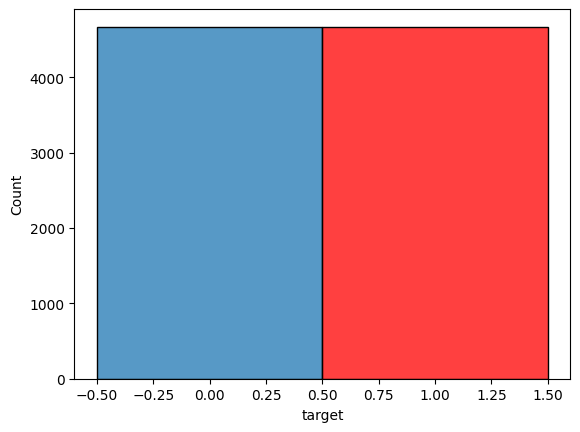

In [ ]:
sns.histplot(merged[merged['target']==0]['target'])
sns.histplot(merged[merged['target']==1]['target'],color='red')

***data is balanced**

In [ ]:
#Natural Language ToolKit contains textprocessing libraries

In [ ]:
import nltk

In [ ]:
#Installing nltk
!pip install nltk

In [ ]:
#punkt s used to train unlabeled data
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
#num_characters counts characters of text
merged['num_characters']=merged['text'].apply(len)

In [ ]:
merged.head()

,target,text,num_characters
717,1,+449071512431 URGENT! This is the 2nd attempt ...,161
3560,1,URGENT! We are trying to contact U Todays draw...,156
2003,1,TheMob>Yo yo yo-Here comes a new selection of ...,143
748,1,U are subscribed to the best Mobile Content Se...,131
515,1,"You are guaranteed the latest Nokia Phone, a 4...",147


<Axes: >

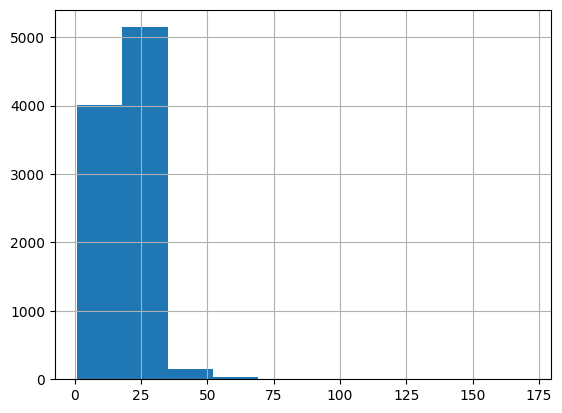

In [ ]:
merged['text'].str.split().map(lambda x:len(x)).hist()

In [ ]:
#num_words counts words of text
merged['num_words']=merged['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [ ]:
merged.head()

,target,text,num_characters,num_words
717,1,+449071512431 URGENT! This is the 2nd attempt ...,161,31
3560,1,URGENT! We are trying to contact U Todays draw...,156,31
2003,1,TheMob>Yo yo yo-Here comes a new selection of ...,143,32
748,1,U are subscribed to the best Mobile Content Se...,131,26
515,1,"You are guaranteed the latest Nokia Phone, a 4...",147,30


<Axes: >

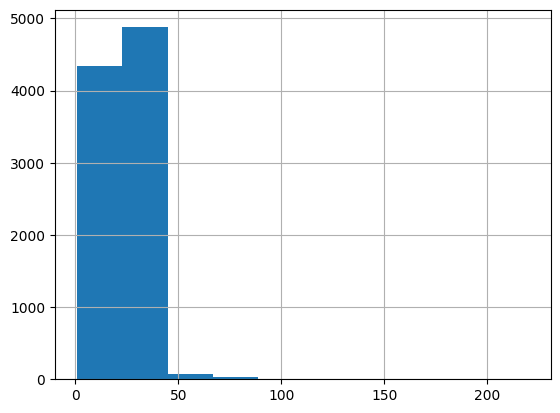

In [ ]:
merged['text'].map(lambda x:len(nltk.word_tokenize(x))).hist()

In [ ]:
#num_sentences counts sentences of the text
merged['num_sentences']=merged['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [ ]:
merged.head()

,target,text,num_characters,num_words,num_sentences
717,1,+449071512431 URGENT! This is the 2nd attempt ...,161,31,5
3560,1,URGENT! We are trying to contact U Todays draw...,156,31,5
2003,1,TheMob>Yo yo yo-Here comes a new selection of ...,143,32,2
748,1,U are subscribed to the best Mobile Content Se...,131,26,2
515,1,"You are guaranteed the latest Nokia Phone, a 4...",147,30,3


In [ ]:
merged[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,9348.000000,9348.000000,9348.000000
mean,104.615319,22.499465,2.403723
std,56.180427,11.918714,1.550282
min,2.000000,1.000000,1.000000
25%,50.000000,12.000000,1.000000
50%,118.000000,24.000000,2.000000
75%,152.000000,31.000000,3.000000
max,910.000000,220.000000,38.000000


In [ ]:
merged[merged['target']==0][['num_characters','num_words','num_sentences']].describe()
#description for ham messages

,num_characters,num_words,num_sentences
count,4674.000000,4674.000000,4674.000000
mean,71.225503,17.357510,1.834189
std,56.356031,13.509186,1.386284
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,53.000000,13.000000,1.000000
75%,92.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [ ]:
merged[merged['target']==1][['num_characters','num_words','num_sentences']].describe()
#description for spam mesagges

,num_characters,num_words,num_sentences
count,4674.000000,4674.000000,4674.000000
mean,138.005135,27.641421,2.973256
std,30.115065,6.982339,1.495528
min,7.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,223.000000,46.000000,9.000000


# HISTPLOTS


<Axes: xlabel='num_characters', ylabel='Count'>

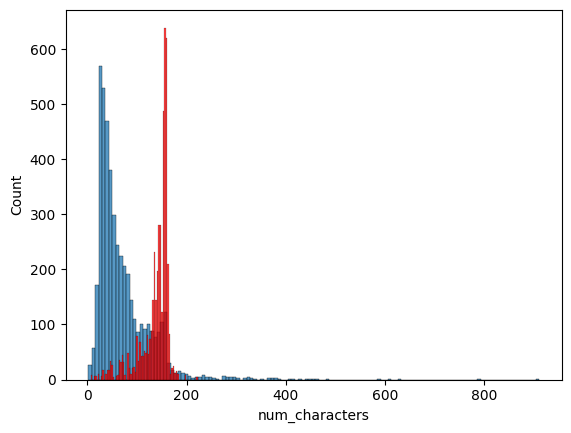

In [ ]:
sns.histplot(merged[merged['target']==0]['num_characters'])
sns.histplot(merged[merged['target']==1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

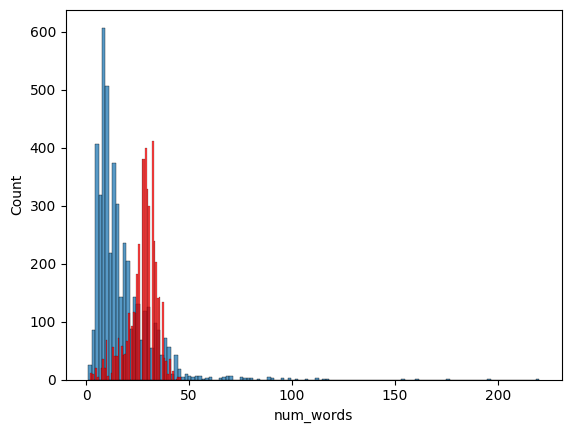

In [ ]:
sns.histplot(merged[merged['target']==0]['num_words'])
sns.histplot(merged[merged['target']==1]['num_words'],color='red')

<Axes: xlabel='num_sentences', ylabel='Count'>

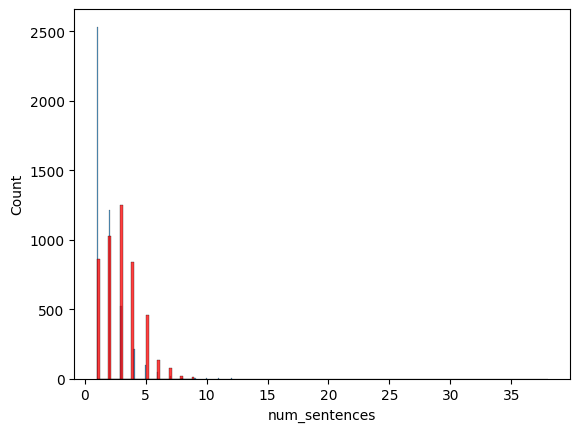

In [ ]:
sns.histplot(merged[merged['target']==0]['num_sentences'])
sns.histplot(merged[merged['target']==1]['num_sentences'],color='red')

# **PAIRPLOTS**

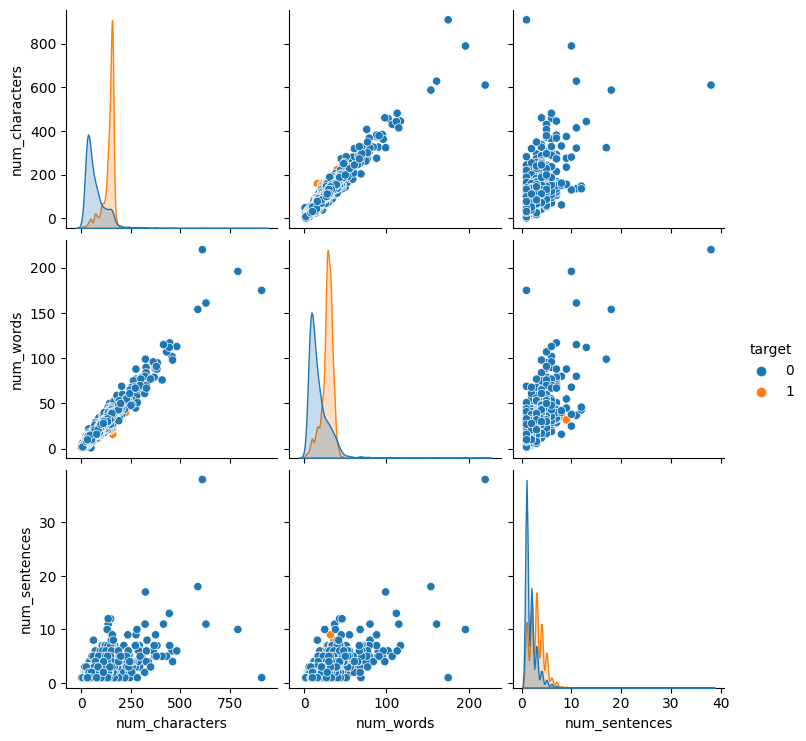

In [ ]:
sns.pairplot(merged,hue='target')

# **HEATMAP**

<ipython-input-55-fd5350f169db>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(merged.corr(),annot=True)


<Axes: >

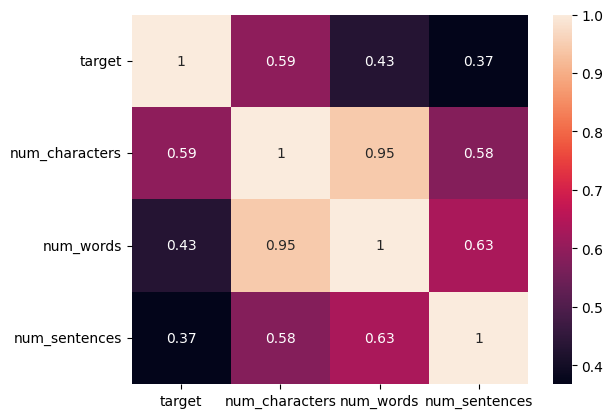

In [ ]:
sns.heatmap(merged.corr(),annot=True)

***positive correlation ->   num_words,num_characters
           negative correlation ->  num_sentences,target normal correlation   ->  num_characters,num_sentences**

# **PREPROCESSING**


#LOWERCASE

<Axes: >

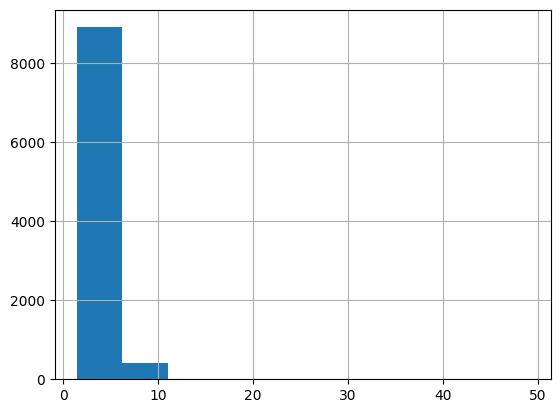

In [ ]:
merged['text'].str.split().apply(lambda x : [len(i) for i in x]).map(lambda x: np.mean(x)).hist()

In [ ]:
def transform_text(text):
  text=text.lower()

  return text

In [ ]:
transform_text('ml project')

'ml project'

# TOKENIZATION

In [ ]:
def transform_text(text):
  text=nltk.word_tokenize(text)
  return text

In [ ]:
transform_text('ml project')

['ml', 'project']

#REMOVING SPECIAL CHARACTERS

In [ ]:
def transform_text(text):
  text=nltk.word_tokenize(text)
  y=[]
  for i in text:
    if i.isalnum():
      y.append(i)
  return y

In [ ]:
transform_text('ml projrct @ spam or ham')

['ml', 'projrct', 'spam', 'or', 'ham']

#REMOVING STOPWORDS AND PUNCTUATION

In [ ]:
nltk.download('stopwords')
from nltk.corpus import stopwords
stop=stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
corpus=[]
new= merged['text'].str.split()
new=new.values.tolist()
corpus=[word for i in new for word in i]

from collections import defaultdict
dic=defaultdict(int)
for word in corpus:
    if word in stop:
        dic[word]+=1

<Axes: >

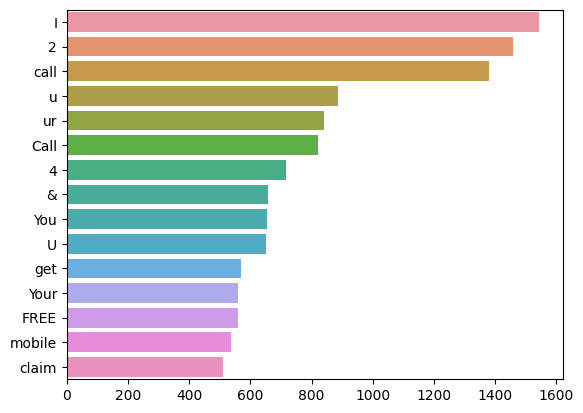

In [ ]:
from collections import Counter
counter=Counter(corpus)
most=counter.most_common()

x, y= [], []
for word,count in most[:40]:
    if (word not in stop):
        x.append(word)
        y.append(count)

sns.barplot(x=y,y=x)

In [ ]:
def transform_text(text):
  text=nltk.word_tokenize(text)
  y=[]
  for i in text:
    if i.isalnum():
      y.append(i)
  text=y[:]
  y.clear()
  for i in text:
    if i not in stopwords.words('english') and i not in string.punctuation:
      y.append(i)
  return y

In [ ]:
transform_text('ml project @ spam or ham')

['ml', 'project', 'spam', 'ham']

#STEMMING

In [ ]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
ps.stem('doing')

'do'

In [ ]:
def transform_text(text):
  text=nltk.word_tokenize(text)
  y=[]
  for i in text:
    if i.isalnum():
      y.append(i)
  text=y[:]
  y.clear()
  for i in text:
    if i not in stopwords.words('english') and i not in string.punctuation:
      y.append(i)
  text=y[:]
  y.clear()
  for i in text:
    y.append(ps.stem(i))

  return " ".join(y)

In [ ]:
transform_text('I loved doing projects on Machine Learning.How about you?')

'i love project machin'

In [ ]:
merged['text'][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

#PREPROCESSING MERGED DATA

In [ ]:
merged['transformed_text']=merged['text'].apply(transform_text)

In [ ]:
merged.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
717,1,+449071512431 URGENT! This is the 2nd attempt ...,161,31,5,urgent thi 2nd attempt contact u u won call 09...
3560,1,URGENT! We are trying to contact U Todays draw...,156,31,5,urgent we tri contact u today draw show prize ...
2003,1,TheMob>Yo yo yo-Here comes a new selection of ...,143,32,2,themob yo yo come new select hot download memb...
748,1,U are subscribed to the best Mobile Content Se...,131,26,2,u subscrib best mobil content servic uk per 10...
515,1,"You are guaranteed the latest Nokia Phone, a 4...",147,30,3,you guarante latest nokia phone 40gb ipod mp3 ...


# **WORD CLOUD**
# To visualize most prominent words in the text

In [ ]:
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [ ]:
spam_wc=wc.generate(merged[merged['target']==1]['transformed_text'].str.cat(sep=" "))

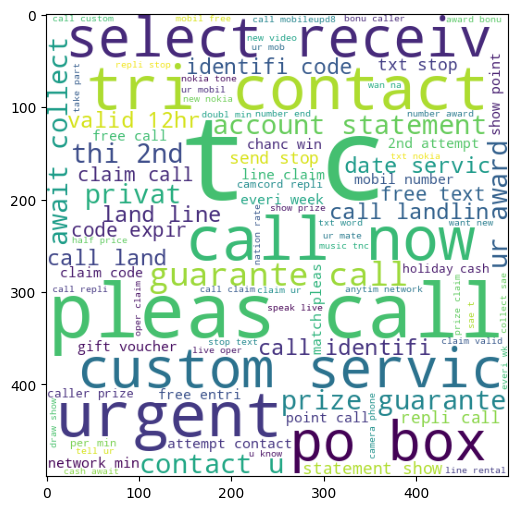

In [ ]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

**Most repeated words in spam are free,call**

In [ ]:
ham_wc=wc.generate(merged[merged['target']==0]['transformed_text'].str.cat(sep=" "))

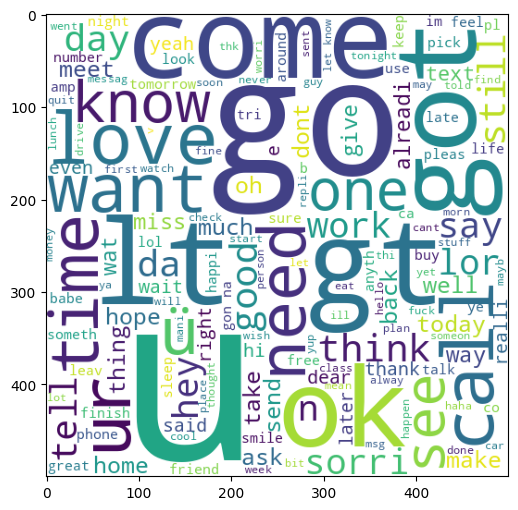

In [ ]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

**most repeated words in ham are come,got**

In [ ]:
merged.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
717,1,+449071512431 URGENT! This is the 2nd attempt ...,161,31,5,urgent thi 2nd attempt contact u u won call 09...
3560,1,URGENT! We are trying to contact U Todays draw...,156,31,5,urgent we tri contact u today draw show prize ...
2003,1,TheMob>Yo yo yo-Here comes a new selection of ...,143,32,2,themob yo yo come new select hot download memb...
748,1,U are subscribed to the best Mobile Content Se...,131,26,2,u subscrib best mobil content servic uk per 10...
515,1,"You are guaranteed the latest Nokia Phone, a 4...",147,30,3,you guarante latest nokia phone 40gb ipod mp3 ...


In [ ]:
merged_corpus=[]
for msg in merged[merged['target']==1]['transformed_text'].tolist():
  for word in msg.split():
    merged_corpus.append(word)

In [ ]:
len(merged_corpus)

78357

In [ ]:
merged.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
717,1,+449071512431 URGENT! This is the 2nd attempt ...,161,31,5,urgent thi 2nd attempt contact u u won call 09...
3560,1,URGENT! We are trying to contact U Todays draw...,156,31,5,urgent we tri contact u today draw show prize ...
2003,1,TheMob>Yo yo yo-Here comes a new selection of ...,143,32,2,themob yo yo come new select hot download memb...
748,1,U are subscribed to the best Mobile Content Se...,131,26,2,u subscrib best mobil content servic uk per 10...
515,1,"You are guaranteed the latest Nokia Phone, a 4...",147,30,3,you guarante latest nokia phone 40gb ipod mp3 ...


# **MODEL BUILDING**

In [ ]:
#importing required features
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv=CountVectorizer()
tfdif=TfidfVectorizer(max_features=3000)

In [ ]:
X=cv.fit_transform(merged['transformed_text']).toarray()

In [ ]:
from sklearn.preprocessing import MinMaxScaler
s=MinMaxScaler()
X=s.fit_transform(X)

In [ ]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
y=merged['target'].values

In [ ]:
y

array([1, 1, 1, ..., 0, 0, 0])

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
#splitting data for testing and training
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [ ]:
#to measure the performance of the matrices
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score,f1_score

In [ ]:
#Using different algorithms for model training and for also improving the performance
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [ ]:
svc=SVC(kernel='sigmoid',gamma=1.0)
knc=KNeighborsClassifier()
mnv=MultinomialNB()
dtc=DecisionTreeClassifier(max_depth=5)
lrc=LogisticRegression(solver='liblinear',penalty='l1')
rfc=RandomForestClassifier(n_estimators=50,random_state=2)
abc=AdaBoostClassifier(n_estimators=50,random_state=2)
bc=BaggingClassifier(n_estimators=50,random_state=2)
etc=ExtraTreesClassifier(n_estimators=50,random_state=2)
gbdt=GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb=XGBClassifier(n_estimators=50,random_state=2)

In [ ]:
clfs={
    'SVC':svc,
    'KN':knc,
    'NB':mnv,
    'DT':dtc,
    'LR':lrc,
    'RF':rfc,
    'AdaBoost':abc,
    'Bgc':bc,
    'ETC':etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [ ]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
  clf.fit(X_train,y_train)
  y_pred=clf.predict(X_test)
  accuracy=accuracy_score(y_test,y_pred)
  precision=precision_score(y_test,y_pred)
  recall=recall_score(y_test,y_pred)
  f1=f1_score(y_test,y_pred)

  return accuracy,precision,recall,f1

In [ ]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.925668449197861, 0.9247648902821317, 0.9296218487394958, 0.927187008905186)

In [ ]:
accuracy_scores=[]
precision_scores=[]
recall_scores=[]
f1_scores=[]

for name,clf in clfs.items():
  current_accuracy,current_precision,current_recall,current_f1=train_classifier(clf,X_train,y_train,X_test,y_test)
  print("For ",name)
  print("Accuracy- ",current_accuracy)
  print("Precision-",current_precision)
  print("Recall-",current_recall)
  print("F1-score -",current_f1)

  accuracy_scores.append(current_accuracy)
  precision_scores.append(current_precision)
  recall_scores.append(current_recall)
  f1_scores.append(current_f1)

For  SVC
Accuracy-  0.925668449197861
Precision- 0.9247648902821317
Recall- 0.9296218487394958
F1-score - 0.927187008905186
For  KN
Accuracy-  0.9737967914438502
Precision- 0.9988950276243094
Recall- 0.9495798319327731
F1-score - 0.9736133548734518
For  NB
Accuracy-  0.9850267379679144
Precision- 0.98125
Recall- 0.9894957983193278
F1-score - 0.9853556485355649
For  DT
Accuracy-  0.8727272727272727
Precision- 0.9322033898305084
Recall- 0.8088235294117647
F1-score - 0.8661417322834646
For  LR
Accuracy-  0.9946524064171123
Precision- 0.9896049896049897
Recall- 1.0
F1-score - 0.9947753396029259
For  RF
Accuracy-  0.9994652406417113
Precision- 0.9989506820566632
Recall- 1.0
F1-score - 0.9994750656167979
For  AdaBoost
Accuracy-  0.9497326203208556
Precision- 0.9693654266958425
Recall- 0.930672268907563
F1-score - 0.9496248660235799
For  Bgc
Accuracy-  0.9855614973262032
Precision- 0.9724208375893769
Recall- 1.0
F1-score - 0.986017607457276
For  ETC
Accuracy-  0.9978609625668449
Precision- 0.

In [ ]:
performance_merged=pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores,'Recall':recall_scores,'F1-Score':f1_scores}).sort_values('Precision',ascending=False)

In [ ]:
performance_merged

,Algorithm,Accuracy,Precision,Recall,F1-Score
5,RF,0.999465,0.998951,1.000000,0.999475
8,ETC,0.997861,0.998947,0.996849,0.997897
1,KN,0.973797,0.998895,0.949580,0.973613
4,LR,0.994652,0.989605,1.000000,0.994775
2,NB,0.985027,0.981250,0.989496,0.985356
10,xgb,0.974332,0.976793,0.972689,0.974737
7,Bgc,0.985561,0.972421,1.000000,0.986018
6,AdaBoost,0.949733,0.969365,0.930672,0.949625
9,GBDT,0.916043,0.946128,0.885504,0.914813
3,DT,0.872727,0.932203,0.808824,0.866142


**performance evalution of all algorithms**

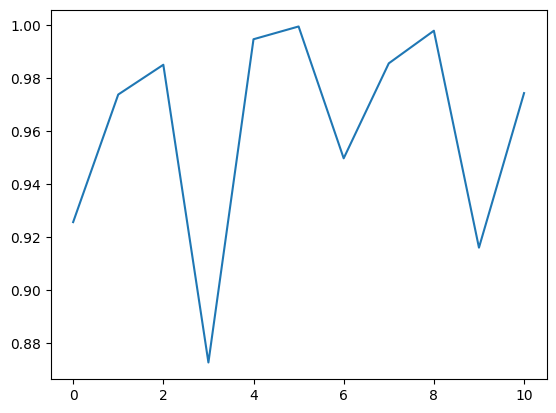

In [ ]:
plt.plot(accuracy_scores)

**From the above graph it shows accuracy,precision,f1,recall values ae highest in NaiveBayes**

<Figure size 1000x800 with 0 Axes>

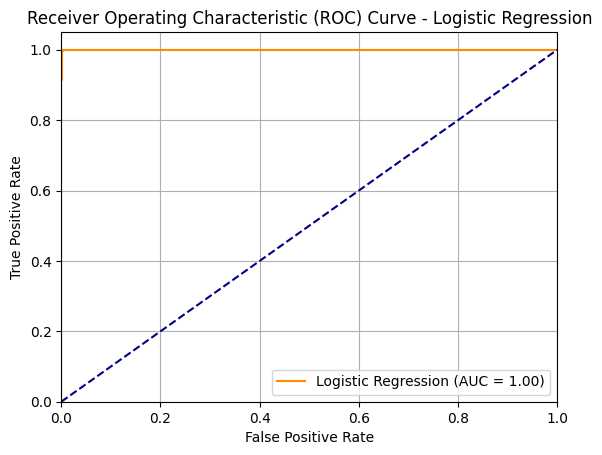

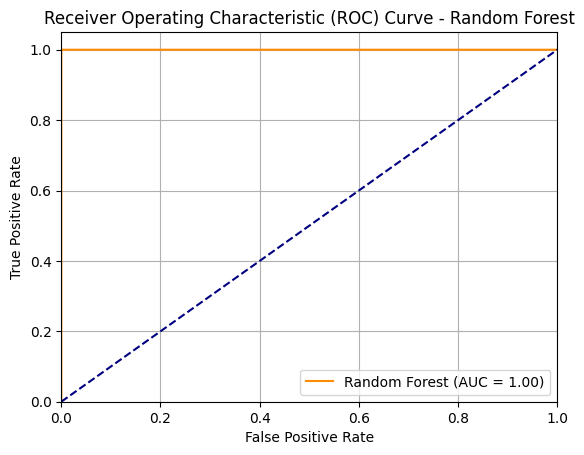

In [ ]:
from sklearn.metrics import roc_curve, auc

classifiers = {
    "Logistic Regression": LogisticRegression(),
     "Random Forest": RandomForestClassifier(),

}

plt.figure(figsize=(10, 8))

for clf_name, classifier in classifiers.items():

    classifier.fit(X_train, y_train)


    y_prob = classifier.predict_proba(X_test)[:, 1]


    fpr, tpr, _ = roc_curve(y_test, y_prob)

    auc_score = auc(fpr, tpr)


    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', label=f"{clf_name} (AUC = {auc_score:.2f})")
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic (ROC) Curve - {clf_name}')
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.show()

<Figure size 1000x800 with 0 Axes>

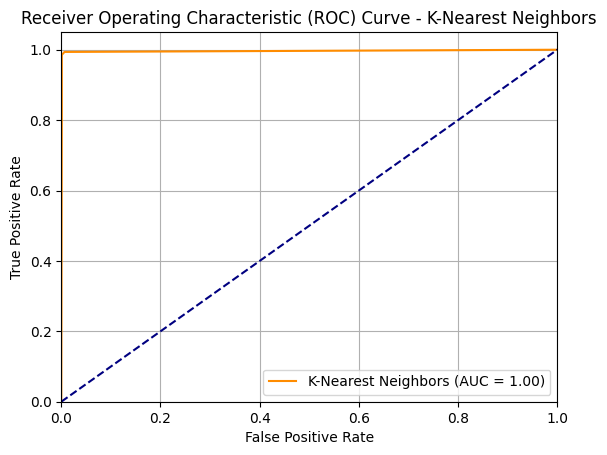

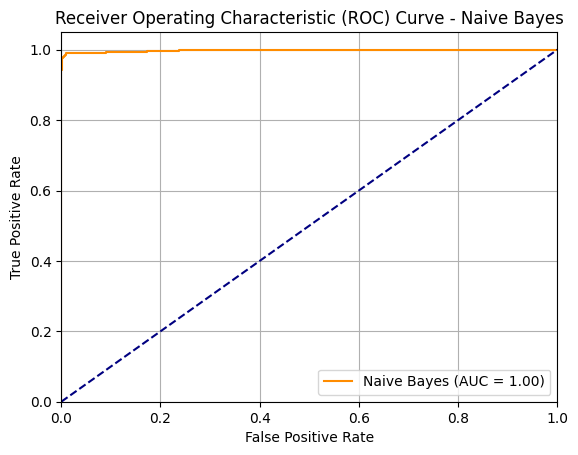

In [ ]:
from sklearn.metrics import roc_curve, auc

classifiers = {
    "K-Nearest Neighbors": KNeighborsClassifier(),
     "Naive Bayes": MultinomialNB(),


}

plt.figure(figsize=(10, 8))

for clf_name, classifier in classifiers.items():

    classifier.fit(X_train, y_train)


    y_prob = classifier.predict_proba(X_test)[:, 1]


    fpr, tpr, _ = roc_curve(y_test, y_prob)

    auc_score = auc(fpr, tpr)


    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', label=f"{clf_name} (AUC = {auc_score:.2f})")
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic (ROC) Curve - {clf_name}')
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.show()

<Figure size 1000x800 with 0 Axes>

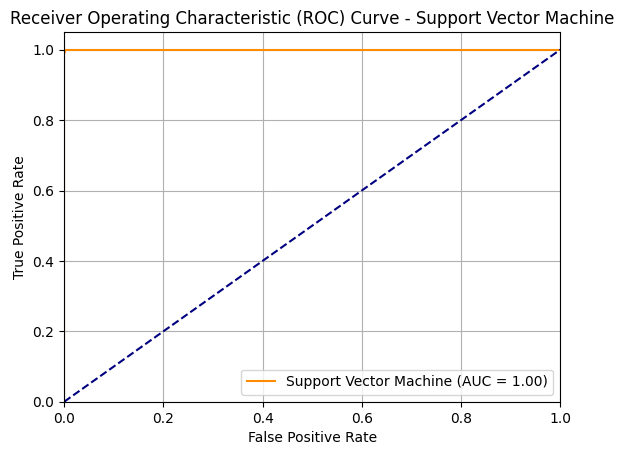

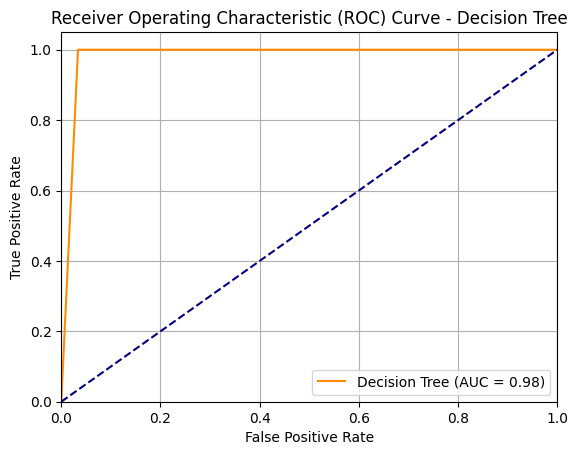

In [ ]:
from sklearn.metrics import roc_curve, auc

classifiers = {
    "Support Vector Machine": SVC(probability=True),
     "Decision Tree": DecisionTreeClassifier(),


}

plt.figure(figsize=(10, 8))

for clf_name, classifier in classifiers.items():

    classifier.fit(X_train, y_train)


    y_prob = classifier.predict_proba(X_test)[:, 1]


    fpr, tpr, _ = roc_curve(y_test, y_prob)

    auc_score = auc(fpr, tpr)


    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', label=f"{clf_name} (AUC = {auc_score:.2f})")
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic (ROC) Curve - {clf_name}')
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.show()

<Figure size 1000x800 with 0 Axes>

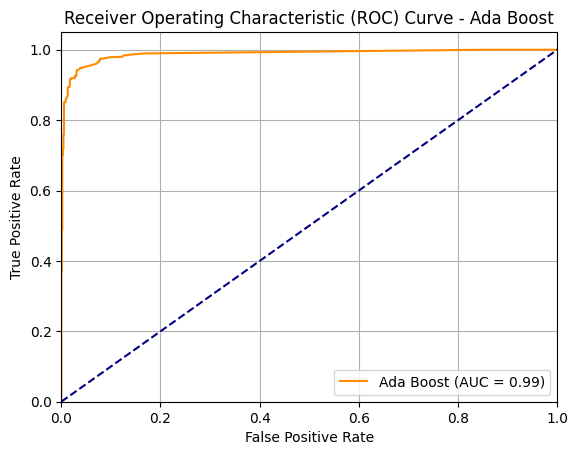

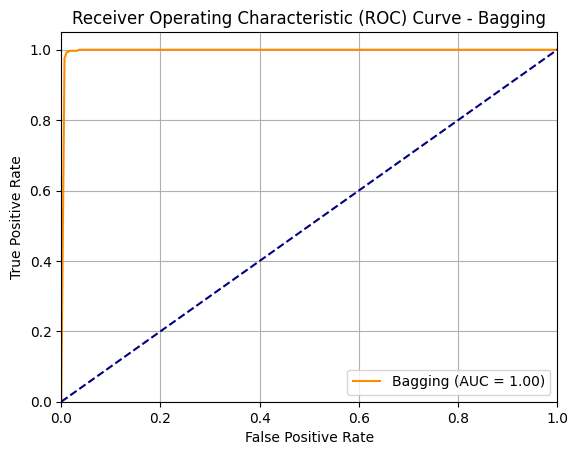

In [ ]:
from sklearn.metrics import roc_curve, auc

classifiers = {
    "Ada Boost": AdaBoostClassifier(),
     "Bagging":BaggingClassifier(),


}

plt.figure(figsize=(10, 8))

for clf_name, classifier in classifiers.items():

    classifier.fit(X_train, y_train)


    y_prob = classifier.predict_proba(X_test)[:, 1]


    fpr, tpr, _ = roc_curve(y_test, y_prob)

    auc_score = auc(fpr, tpr)


    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', label=f"{clf_name} (AUC = {auc_score:.2f})")
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic (ROC) Curve - {clf_name}')
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.show()

<Figure size 1000x800 with 0 Axes>

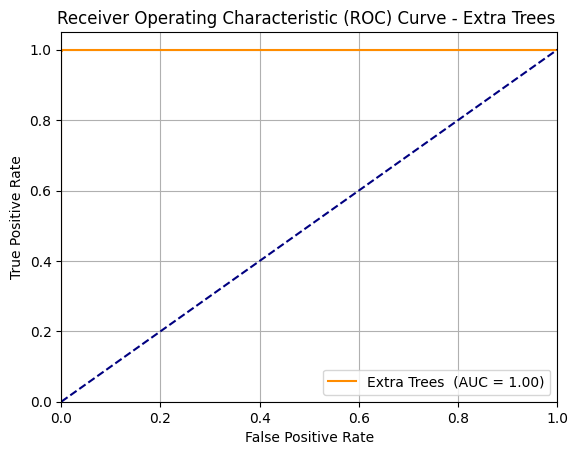

In [ ]:
from sklearn.metrics import roc_curve, auc

classifiers = {
    "Extra Trees ":ExtraTreesClassifier()


}

plt.figure(figsize=(10, 8))

for clf_name, classifier in classifiers.items():

    classifier.fit(X_train, y_train)


    y_prob = classifier.predict_proba(X_test)[:, 1]


    fpr, tpr, _ = roc_curve(y_test, y_prob)

    auc_score = auc(fpr, tpr)


    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', label=f"{clf_name} (AUC = {auc_score:.2f})")
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic (ROC) Curve - {clf_name}')
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.show()

In [ ]:
from sklearn.metrics import roc_curve, auc

classifiers = {
    "Xgb Classifier": XGBClassifier(),
     "Gradient Boosting": GradientBoostingClassifier(),


}

plt.figure(figsize=(10, 8))

for clf_name, classifier in classifiers.items():

    classifier.fit(X_train, y_train)


    y_prob = classifier.predict_proba(X_test)[:, 1]


    fpr, tpr, _ = roc_curve(y_test, y_prob)

    auc_score = auc(fpr, tpr)


    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', label=f"{clf_name} (AUC = {auc_score:.2f})")
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic (ROC) Curve - {clf_name}')
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.show()